#Test from Research Paper for The Jumping Spiders Team

Following the techniques for text-segmentation and parsing developed in [*Utilizing Artificial Intelligence for Text Segmentation from Images*](https://web.p.ebscohost.com/ehost/pdfviewer/pdfviewer?vid=0&sid=0531eae4-3f69-483c-b4a5-b8f728de4b78%40redis), I hope to find an effective way to preprocess, train, and test the model while yeilding high success rates.

> These tests were conducted by Alexia Rangel K.

---


# Data Collection and Input
Just used images that were collected from the Lepidorma library and had legible machine text



In [1]:
#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/data_folder/tjs-butterfly-imagetotext/
%ldir

/content/drive/MyDrive/Colab Notebooks/data_folder/tjs-butterfly-imagetotext
drwx------ 2 root      4096 Feb 10 21:32 Butterflies/
drwx------ 2 root      4096 Feb 11 01:13 train_images/


In [3]:
import pandas as pd #Dataframe stuff
import tensorflow as tf #Tensorflow is a machine learning dataset used for building Neural Nets
import os #Used to navigate through file structures
import cv2 as cv
from matplotlib import pyplot as plt

In [4]:
butterfly_dir = 'Butterflies'
train_dir = 'train_images'

In [5]:
butterfly_df = pd.read_csv("TJS-Test3-ExactGeoInfo.csv")
butterfly_df

,Image_Path,Correct_Text
0,MGCL 1169103,"USA: Arizona Graham Co. Mt. Graham 10,000 ft. ..."
1,MGCL 1167602,"P. s. marcellina June 28, 1969 Brownsville, Te..."
2,MGCL 1167603,P. e sannae Bentsen-Rio Grande State Park Hida...
3,MGCL 1168927,ARIZ: Santa Cruz Co. Sycamore Canyon 2-IX-77 l...
4,MGCL 1152779,FLORIDA: Alachua Co.; Gainesville 2004 SE 41st...
5,MGCL 1152780,FLORIDA: Alachua Co.; Gainesville 2004 SE 41st...
6,MGCL 1165517,"MEXICO: Chiapas, Ocozocoautla September 1948 E..."
7,MGCL 1165803,MEXICO: Guerrero Acahuizotla Sep 1950 Ex. K. H...
8,MGCL 1165810,MEXICO: Guerrero Acahuizotla Sep 1950 Ex. K. H...
9,MGCL 1165809,MEXICO: Veracruz Presidió August 1953 Ex. K. H...


In [6]:
# Previous Operation:
# train_df = pd.read_csv("annot.csv")
# train_df.drop(columns=["Unnamed: 0", "points", "area"], axis=1, inplace=True)
# train_df.head(5)

In [7]:
def checkExt (data_dir):
  #Quick Reviewing the Extensions
  count = 0;
  for image in os.listdir(data_dir):
    #For each image in the tjs directory
    image_path = os.path.join(data_dir, image)
    count = count + 1
    try:
      img = cv.imread(image_path)
      ext = image_path.lower().endswith(('.jpg', '.jpeg'))    #ISSUE HERE FOR SOME REASON
      if not ext:
        print('Image not in ext list {}'.format(image_path))
    except Exception as e:
      print('Issue with image {}, {}'.format(image_path, e))
  print('Counted', count, 'images')

In [8]:
# Previous Operation: to check that all the files in data folder are a .jpg or .jpeg
# checkExt(butterfly_dir)
# checkExt(train_dir)

In [9]:
image_files = sorted(os.listdir(butterfly_dir))
butterfly_df_imagePath = butterfly_df.sort_values(by='Image_Path')
butterfly_df_imagePath.reset_index(drop=True, inplace=True)
butterfly_df_imagePath['image_path'] = [os.path.join(butterfly_dir, img) for img in image_files]
print(butterfly_df_imagePath.head());

     Image_Path                                       Correct_Text  \
0  MGCL 1152779  FLORIDA: Alachua Co.; Gainesville 2004 SE 41st...   
1  MGCL 1152780  FLORIDA: Alachua Co.; Gainesville 2004 SE 41st...   
2  MGCL 1165517  MEXICO: Chiapas, Ocozocoautla September 1948 E...   
3  MGCL 1165803  MEXICO: Guerrero Acahuizotla Sep 1950 Ex. K. H...   
4  MGCL 1165804  MEXICO: Guerrero Acahuizotla Sep 1955 Ex. K. H...   

                     image_path  
0  Butterflies/MGCL 1152779.jpg  
1  Butterflies/MGCL 1152780.jpg  
2  Butterflies/MGCL 1165517.jpg  
3  Butterflies/MGCL 1165803.jpg  
4  Butterflies/MGCL 1165804.jpg  


In [10]:
# Previous Operation: to add the path of the images to the end of each corresponding line
# image_files = sorted(os.listdir(train_dir))
# train_df_imagePath = train_df
# train_df_imagePath.reset_index(drop=True, inplace=True)
# train_df_imagePath['image_path'] = None

# for img in image_files:
#   img_path = os.path.join(train_dir, img)
#   img_name, ext= os.path.splitext(img)
#   train_df_imagePath.loc[train_df_imagePath['image_id'] == img_name, 'image_path'] = img_path

# train_df_imagePath.head(20)

In [11]:
# Previous Operation: saving the dataframe
# train_df_imagePath.to_csv('annot_path.csv')
# now we're loading this dataframe
train_data = pd.read_csv('annot_path.csv')

In [12]:
print(train_data.iloc[60:75])

    Unnamed: 0                   id          image_id  \
60          60  4bf43a7b2a898044_34  4bf43a7b2a898044   
61          61  4bf43a7b2a898044_35  4bf43a7b2a898044   
62          62  4bf43a7b2a898044_36  4bf43a7b2a898044   
63          63  4bf43a7b2a898044_37  4bf43a7b2a898044   
64          64  4bf43a7b2a898044_38  4bf43a7b2a898044   
65          65  4bf43a7b2a898044_39  4bf43a7b2a898044   
66          66  4bf43a7b2a898044_40  4bf43a7b2a898044   
67          67  4bf43a7b2a898044_41  4bf43a7b2a898044   
68          68  4bf43a7b2a898044_42  4bf43a7b2a898044   
69          69  4bf43a7b2a898044_43  4bf43a7b2a898044   
70          70  4bf43a7b2a898044_44  4bf43a7b2a898044   
71          71  4bf43a7b2a898044_45  4bf43a7b2a898044   
72          72  4bf43a7b2a898044_46  4bf43a7b2a898044   
73          73  4bf43a7b2a898044_47  4bf43a7b2a898044   
74          74   1b55b309b0f50d02_1  1b55b309b0f50d02   

                               bbox utf8_string  \
60    [811.92, 255.67, 13.63, 9.69] 

#Pre-processing


*   image binarization using Otsu's method
*   image smoothing using Gaussian filter
*   image enhancement using Contrast Limited Adaptive Histogram Equalization (CLAHE) algorithm
*   crop Image





In [56]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image, ImageFilter
import numpy as np
from google.colab.patches import cv2_imshow as show_img
from scipy.ndimage import gaussian_filter
from copy import deepcopy

In [51]:
def imgPreprocessing(img_path):
  image = cv.imread(img_path, cv.IMREAD_GRAYSCALE)

  # Normalize
  normalized_image = image.astype(np.float32) / 255.0

  # Resize image
  resized_image = cv.resize(normalized_image, (256, 256))

  # Apply Gaussian filter
  sigma = 2  # Standard deviation for Gaussian kernel (higher = more blur)
  blurred_image = gaussian_filter(resized_image, sigma=sigma)

  # Convert to 8-bit unsigned integer (necessary for OpenCV functions)
  blurred_image_8bit = (blurred_image * 255).astype(np.uint8)

  # Apply Otsu's thresholding
  _, binary_image = cv.threshold(blurred_image_8bit, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

  # Apply CLAHE Algorithm
  clahe = cv.createCLAHE(clipLimit=5)
  clahe_img = clahe.apply(binary_image) + 10

  #show images
  # show_img(image)
  # show_img(blurred_image)
  # show_img(binary_image)
  # show_img(clahe_img)
  # show_img(normalized_image)
  cv.waitKey(0)
  cv.destroyAllWindows()
  return clahe_img

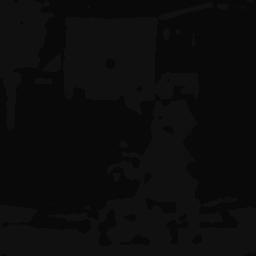

<class 'numpy.ndarray'>


In [49]:
test = imgPreprocessing("train_images/4bf43a7b2a898044.jpg")
print(type(test))

In [62]:
# Function to convert images to tensors
def img_to_tensor(img_path):
    img_array = imgPreprocessing(img_path)
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
    return img_tensor

In [63]:
train_imageData = train_data.head(73);
train_imageData['image_data'] = None
image_files = sorted(os.listdir(train_dir))

train_imageData['image_data'] = train_imageData['image_path'].apply(img_to_tensor)

<ipython-input-63-7dcc4a95dcff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_imageData['image_data'] = None
<ipython-input-63-7dcc4a95dcff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_imageData['image_data'] = train_imageData['image_path'].apply(img_to_tensor)


In [64]:
train_imageData.head(50)

,Unnamed: 0,id,image_id,bbox,utf8_string,image_path,image_data
0,0,a4ea732cd3d5948a_1,a4ea732cd3d5948a,"[525.83, 3.4, 197.64, 33.94]",Performance,train_images/a4ea732cd3d5948a.jpg,"((tf.Tensor(9.0, shape=(), dtype=float32), tf...."
1,1,a4ea732cd3d5948a_2,a4ea732cd3d5948a,"[534.67, 64.68, 91.22, 38.19]",Sport,train_images/a4ea732cd3d5948a.jpg,"((tf.Tensor(9.0, shape=(), dtype=float32), tf...."
2,2,a4ea732cd3d5948a_3,a4ea732cd3d5948a,"[626.95, 63.62, 96.52, 31.82]",Watch,train_images/a4ea732cd3d5948a.jpg,"((tf.Tensor(9.0, shape=(), dtype=float32), tf...."
3,3,a4ea732cd3d5948a_4,a4ea732cd3d5948a,"[577.4, 141.87, 147.13, 43.1]",...period.,train_images/a4ea732cd3d5948a.jpg,"((tf.Tensor(9.0, shape=(), dtype=float32), tf...."
4,4,a4ea732cd3d5948a_5,a4ea732cd3d5948a,"[391.03, 163.9, 60.82, 38.65]",.,train_images/a4ea732cd3d5948a.jpg,"((tf.Tensor(9.0, shape=(), dtype=float32), tf...."
5,5,a4ea732cd3d5948a_6,a4ea732cd3d5948a,"[455.64, 204.45, 21.97, 24.82]",400,train_images/a4ea732cd3d5948a.jpg,"((tf.Tensor(9.0, shape=(), dtype=float32), tf...."
6,6,a4ea732cd3d5948a_7,a4ea732cd3d5948a,"[474.58, 234.95, 17.24, 24.25]",300,train_images/a4ea732cd3d5948a.jpg,"((tf.Tensor(9.0, shape=(), dtype=float32), tf...."
7,7,a4ea732cd3d5948a_8,a4ea732cd3d5948a,"[506.48, 263.69, 25.42, 41.99]",15,train_images/a4ea732cd3d5948a.jpg,"((tf.Tensor(9.0, shape=(), dtype=float32), tf...."
8,8,a4ea732cd3d5948a_9,a4ea732cd3d5948a,"[346.4, 177.05, 54.56, 38.48]",12,train_images/a4ea732cd3d5948a.jpg,"((tf.Tensor(9.0, shape=(), dtype=float32), tf...."
9,9,a4ea732cd3d5948a_10,a4ea732cd3d5948a,"[364.49, 163.27, 19.82, 16.08]",60,train_images/a4ea732cd3d5948a.jpg,"((tf.Tensor(9.0, shape=(), dtype=float32), tf...."


In [61]:
train_imageData = train_data.head(73);

train_imageData['image_data'] = None
image_files = sorted(os.listdir(train_dir))

for img in image_files:
  img_path = os.path.join(train_dir, img)
  if img_path in train_imageData['image_path'].values:
    img_array = imgPreprocessing(img_path)
    img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)
    train_imageData.loc[train_imageData['image_path'] == img_path, 'image_data'] = [img_tensor]
    # df = deepcopy(train_imageData.loc[train_imageData['image_path'] == img_path])
    # df['image_data'] = [img_array]
    # print('\nresult dataframe :\n', df)
    #train_imageData.loc[train_imageData['image_path'] == img_path, 'image_data'] = img_array

<ipython-input-61-cf788db456f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_imageData['image_data'] = None


ValueError: Must have equal len keys and value when setting with an iterable



---



---



---


# After this is a lot of testing that isn't done, don't cross over!

In [ ]:
from sklearn.model_selection import train_test_split

# Extract image data and labels
X = np.array(df['processed_image'].tolist())  # Convert list of images to NumPy array
y = np.array(df['word'].tolist())  # Text labels

# Normalize image data
X = X.reshape(-1, 256, 256, 1)  # Ensure correct shape for CNN input
X = X.astype('float32') / 255.0  # Normalize pixel values

# Encode text labels (one-hot encoding)
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convert words to numerical labels
y_encoded = to_categorical(y_encoded)  # One-hot encoding

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert into TensorFlow dataset format
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(32)

Attempting to dynamically feed images into a model

In [18]:
# train_imageData = train_data.head(73);

# train_imageData['image_data'] = None
# image_files = sorted(os.listdir(train_dir))

# for img in image_files:
#   img_path = os.path.join(train_dir, img)
#   if (img_path in train_imageData['image_path'].values):
#     print("yay")
#     img_array = imgPreprocessing(img_path)
#     train_imageData.loc[train_imageData['image_path'] == img_path, 'image_data'] = img_array

#train_imageData['image_data'] = train_data['image_path'].apply(lambda x: imgPreprocessing(x))

<ipython-input-18-23a1728610cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_imageData['image_data'] = None


yay


ValueError: Must have equal len keys and value when setting with an ndarray

In [ ]:
print(train_imageData.iloc[0:74])

In [ ]:
train_imageData.to_csv('annot_imageData.csv')

# Text Segmentation Algorithms


# Evaluations
